In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### tips
1. 컬럼의 이름을 변경 -> ["총 금액","팁","성별","흡연 여부","요일","시간","인원"]
2. 총 금액, 팁 소수점 첫째 자리는 유지하고 나머지 값은 반올림하여 올려준다.
3. 식사 인원, 성별 팁의 비율의 평균의 값을 구하고 시각화(bar)

In [4]:
tips.columns = ["총 금액","팁","성별","흡연 여부","요일","시간","인원"]

In [5]:
tips["총 금액"] = round(tips["총 금액"],1)
tips["팁"] = round(tips["팁"],1)
# tips[["총 금액","팁"]] = tips[["총 금액","팁"]].round(1)

In [6]:
## 팁 비율  = 팁 / (총 금액-팁) *100
tips['팁 비율'] = tips['팁']  / (tips['총 금액'] - tips['팁'])*100

In [7]:
group_tip = tips.groupby(["인원","성별"]).mean()['팁 비율']

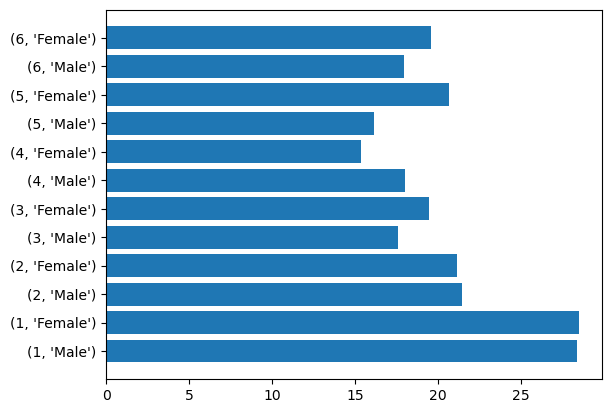

In [8]:
# group_tip.plot.barh()
x = list(range(0,len(group_tip.index),1))
y = group_tip

plt.barh(x,y)
plt.yticks(x, group_tip.index)
plt.show()

In [9]:
## index [() ,()] 형태로 출력
group_tip.index

MultiIndex([(1,   'Male'),
            (1, 'Female'),
            (2,   'Male'),
            (2, 'Female'),
            (3,   'Male'),
            (3, 'Female'),
            (4,   'Male'),
            (4, 'Female'),
            (5,   'Male'),
            (5, 'Female'),
            (6,   'Male'),
            (6, 'Female')],
           names=['인원', '성별'])

In [10]:
group_data = tips.groupby(['인원','성별']).mean()[['팁 비율']]

In [11]:
male_data = pd.DataFrame()
female_data = pd.DataFrame()

for i in group_data.index:
    if i[1] == "Male":
        data = group_data.loc[[i]]
        male_data = pd.concat([male_data,data])
    else :
        data = group_data.loc[[i]]
        female_data = pd.concat([female_data,data])


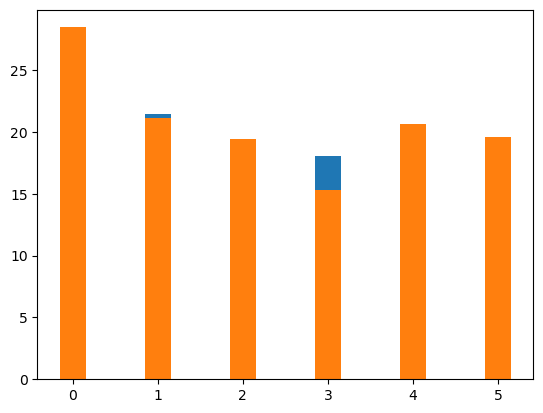

In [15]:
x = list(range(len(male_data)))
y1 = male_data["팁 비율"]
y2 = female_data["팁 비율"]

plt.bar(x,y1,width=0.3)
plt.bar(x,y2,width=0.3)
plt.show()


In [94]:
titanic = sns.load_dataset('titanic')[['age','sex','class','fare','survived']]
titanic.head(1)

,age,sex,class,fare,survived
0,22.0,male,Third,7.25,0


### pivot_table
1. 그룹화 
2. 행 인덱스
3. 열 인덱스
4. 데이터의 값
5. 데이터의 집계 (ex/ min max mean sum)


In [99]:
pv1 = pd.pivot_table(titanic, #기준이되는 데이터프레임
                    index = 'class', #  등급별로 그룹회
                    columns= 'sex',   # 성별로 분할
                    values = 'age',  # 그룹화된 데이터들의 나이를 선택
                    aggfunc = 'mean') # 나이의 평균
pv1

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [100]:
## 등글별 + 성별  생존자의 수
titanic.groupby(["class","sex"])["survived"].sum()

class   sex   
First   female    91
        male      45
Second  female    70
        male      17
Third   female    72
        male      47
Name: survived, dtype: int64

In [103]:
pv2 = pd.pivot_table(titanic,index = 'class',columns='sex',values='survived',aggfunc='sum')
pv2

sex,female,male
class,,
First,91,45
Second,70,17
Third,72,47


<AxesSubplot:ylabel='class,sex'>

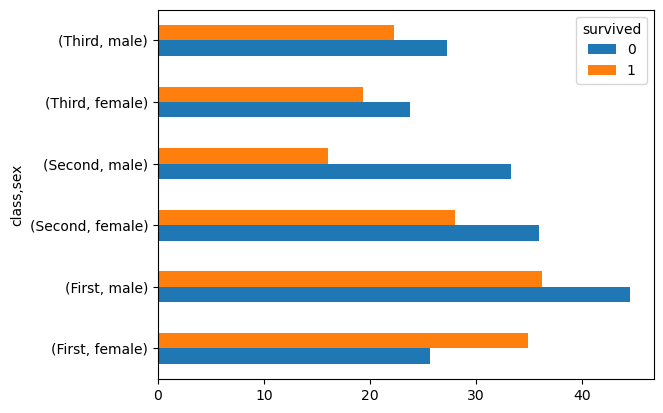

In [112]:
## 자리등급과 성별에 따라서 (index)
# 생존자와 사망자의 (column)
# 나이의 평균
pv3 = pd.pivot_table(titanic,index = ['class','sex'],columns='survived',values='age',aggfunc='mean')
pv3
pv3.plot.barh()

In [116]:
pv3.xs('male',level='sex')   ## 성별이 male인 데이터만 추출

survived,0,1
class,,
First,44.581967,36.248000
Second,33.369048,16.022000
Third,27.255814,22.274211


### fillna()
1. ()괄호 특정 문자열이나 숫자로 결측치를 채워주는 함수
2. 후의 행의 값을 가지고 그 값으로 대체 : bfill
3. 전의 행의 값을 가지고 그 값으로 대체 : ffill


In [117]:
corona = pd.read_csv("../221214/corona.csv")
corona.head(5)

,Unnamed: 0,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,0,2022-12-14 00:42:41.0,31174,27925572,1099,20221214,00:00,NaN,NaN,NaN
1,1,2022-12-13 04:34:20.0,31128,27841001,1098,20221213,00:00,NaN,NaN,NaN
2,2,2022-12-12 00:34:36.0,31099,27754149,1097,20221212,00:00,NaN,NaN,NaN
3,3,2022-12-11 01:10:06.0,31069,27728482,1096,20221211,00:00,NaN,NaN,NaN
4,4,2022-12-10 00:41:17.0,31029,27674163,1095,20221210,00:00,NaN,NaN,NaN


In [120]:
corona['accExamCnt'].fillna(method='bfill')
corona['accExamCnt'].fillna(method='ffill') # 앞에 값이 없으므로 가져올 값이 없음

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
1054    29.0
1055    25.0
1056    21.0
1057    15.0
1058     4.0
Name: accExamCnt, Length: 1059, dtype: float64

In [122]:
corona['accExamCnt'].fillna(corona["accExamCnt"].mean()) ## 평균값으로 대체

0       7.039078e+06
1       7.039078e+06
2       7.039078e+06
3       7.039078e+06
4       7.039078e+06
            ...     
1054    2.900000e+01
1055    2.500000e+01
1056    2.100000e+01
1057    1.500000e+01
1058    4.000000e+00
Name: accExamCnt, Length: 1059, dtype: float64